{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
0.7412206229968792


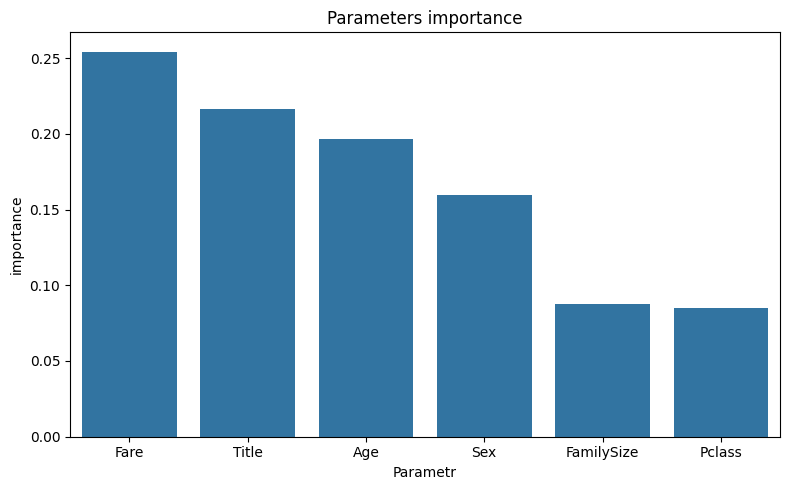

Accuracy: 0.8491620111731844
[[91 14]
 [13 61]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       105
           1       0.81      0.82      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179



In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 

df = pd.read_csv(r"C:\Users\lesha\Desktop\data science\train.csv")

#Data preparation
avg_age=df["Age"].mean()
df["Age"]=df["Age"].fillna(avg_age)
df["Sex"]=df["Sex"].map({"male":1, "female":0})

#feature engineering
df["FamilySize"]=df["SibSp"]+df["Parch"]+1

def get_title(name): 
    if "Mr." in name:
        return "Mr"
    elif "Mrs."  in name:
        return "Mrs"
    elif "Miss."  in name:
        return "Miss"
    elif "Master." in name:
        return "Master"
    else:  
        return "Other"

df["Title"]=df["Name"].apply(get_title)

title_map = {
    "Mr": 1,
    "Mrs": 2,
    "Miss": 3,
    "Master": 4,
    "Other": 5
}
df["Title"] = df["Title"].map(title_map)

X = df[[ "Pclass", "Sex", "Age", "Fare", "FamilySize", "Title"]]
y=df["Survived"]

#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

from sklearn.model_selection import GridSearchCV

#Hyperparameter Grid Definition
parameter_grid= {
    "n_estimators": [200, 500],
    "max_depth": [10,12],
    "max_features": ["sqrt", 3],
    "class_weight":["balanced"]
}

#Grid Search Initialization
grid=GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=parameter_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1  
)
grid.fit(X_train, y_train)




#Best Model Evaluation
best_parameters=grid.best_params_
best_score=grid.best_score_
print(best_parameters)
print(best_score)

#Final Model Training
machine_learn_model=RandomForestClassifier(
    n_estimators=best_parameters["n_estimators"],
    max_depth=best_parameters["max_depth"],
    max_features=best_parameters["max_features"],
    class_weight=best_parameters["class_weight"],
    random_state=42
)
machine_learn_model.fit(X_train, y_train)

#Barplot

import seaborn as sns 
import matplotlib.pyplot as mplt

importance_of_parameter=machine_learn_model.feature_importances_
DataFrame_importance=pd.DataFrame({
    "Parameter": X.columns,
    "importance": importance_of_parameter
})

DataFrame_importance=DataFrame_importance.sort_values(by="importance", ascending=False)

mplt.figure(figsize=(8, 5))
sns.barplot(x="Parameter", y="importance", data=DataFrame_importance)
mplt.title("Parameters importance")
mplt.xlabel("Parametr")
mplt.ylabel("importance")
mplt.tight_layout()
mplt.show()

#prediction
y_pred=machine_learn_model.predict(X_test)


#estimating of model's accuracy by accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

#estimating model's accuracy by confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))
